# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Q1 and Q2. What test is appropriate for this problem? Does CLT apply?
What are the null and alternate hypotheses? </p>
</div>

I think two sample test is the proper one to apply here.

Null Hypothesis: *the calls got by black ratio to total is equal to the calls got by white ratio to total.*

Alternate Hypothesis:  *the calls got by black ratio to total is not equal to the calls got by white ratio to total.*

CLT could be applied here assuming that samples are respresenting the population. Data points for each sample could be assumed to be independent due to the random drawing of the sample.

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [19]:
mean_w=sum(w.call)/w.call.count()
mean_b=sum(b.call)/b.call.count()

In [20]:
print('ratio of callbacks for black-sounding names (Black Mean): ',mean_b)
print('ratio of callbacks for white-sounding names (White Mean): ',mean_w)

ratio of callbacks for black-sounding names (Black Mean):  0.06447638603696099
ratio of callbacks for white-sounding names (White Mean):  0.09650924024640657


Obviously the two ratios are not equal. </p>Since; 
1. **the data is big enough** 
2. we are supposed **to compare the means of two datasets** 
3. **resumes are presented to the employer randomly**, </p>  
we will see if the null hypothesis can be "rejected or not" by two sample z-test.

<div class="span5 alert alert-success">
<p>Q3. Compute margin of error, confidence interval, and p-value. 
Try using both the bootstrapping and the frequentist statistical approaches. </p>
</div>

In [21]:
mean_diff=mean_w-mean_b
print ('Difference between White and Black mean: {}'.format(mean_diff))

Difference between White and Black mean: 0.032032854209445585


*Frequentist Approach;*

In [35]:
p_hat = (np.sum(w.call) + np.sum(b.call)) / len(data)
z = mean_diff / np.sqrt(p_hat*(1-p_hat)*((1/len(w)) + (1/len(b))))
p = stats.norm.cdf(-z) * 2
print('Z score: {}'.format(z))
print('P-value: {}'.format(p))

Z score: 4.108412152434346
P-value: 3.983886837585077e-05


In [39]:
moe = 1.96 * np.sqrt(p_hat*(1-p_hat)*((1/len(w)) + (1/len(b))))
ci = mean_diff + np.array([-1, 1]) * moe
print("Margin of Error: {}".format(moe))
print("Confidence interval: {}".format(ci))

Margin of Error: 0.015281912310894095
Confidence interval: [0.01675094 0.04731477]


*Bootstrapping Approach;*

p-value: 0.0


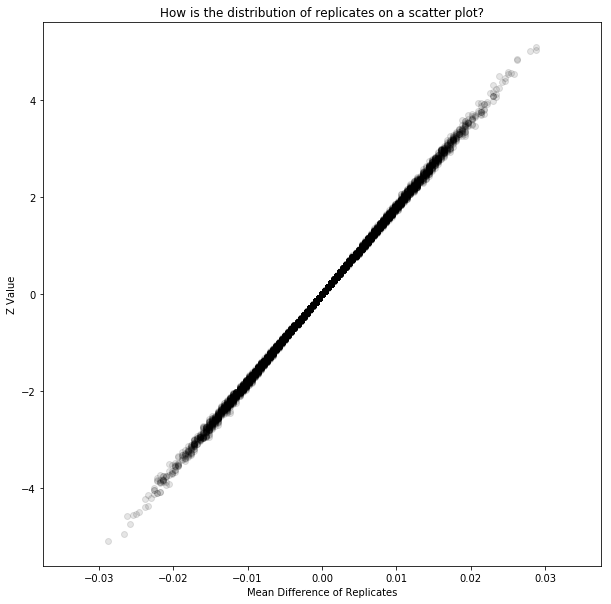

In [66]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

concat_data = np.concatenate((w.call, b.call))

bs_replicates = np.empty(10000)
z_rep = np.empty_like(bs_replicates)

for i in range(10000):
    bs_sample = np.random.choice(concat_data, size=len(concat_data))
    b_replicate = bs_sample[:len(b)]
    w_replicate = bs_sample[len(b):]
    bs_replicates[i] = diff_of_means(b_replicate,w_replicate)
    p_hat_rep = (np.sum(b_replicate) + np.sum(w_replicate)) / len(bs_replicates)
    z_rep[i] = bs_replicates[i] / np.sqrt(p_hat_rep*(1-p_hat_rep)*((1/len(w_replicate)) + (1/len(b_replicate))))
p = np.sum(bs_replicates >= mean_diff) / float(len(bs_replicates))
print ('p-value: {}'.format(p))

plt.figure(figsize = (10,10))
_ = plt.scatter(bs_replicates,z_rep,c='k',alpha=0.1)
_ = plt.xlabel('Mean Difference of Replicates')
_ = plt.ylabel('Z Value')
_ = plt.title ('How is the distribution of replicates on a scatter plot?')
plt.show()

<div class="span5 alert alert-success">
<p>Q4 and Q5: Write a story describing the statistical significance in the context or the original problem.
Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis? </p>
</div>

**P-Value can be assumed to be 0. So that the null hypothesis should be rejected.** They do not have the same call back rate. </p>
The analysis we made does not mean that *race/name* is the most crucial factor in callback success. Although the test shows that a difference exist in callback rate,  other variables as such year of experience, education or maybe military statistics might effect the callback rates and need to be also checked. 
However, this example shows that a significant difference exist.